In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np


In [62]:
from sklearn import linear_model

In [63]:
# 1. The raw data files and their format    &       2. Read in and get an overview of the data
miles=pd.read_csv("miles-driven.csv",sep='|')

In [64]:
miles.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [65]:
miles.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [66]:
acc=pd.read_csv("road-accidents.csv",sep='|',comment='#')

In [67]:
#3. Create a textual and a graphical summary of the data
miles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [68]:
miles.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


In [69]:
acc.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [70]:
acc.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


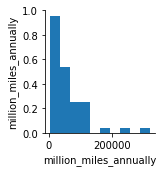

In [71]:
sns.pairplot(miles)
plt.show()



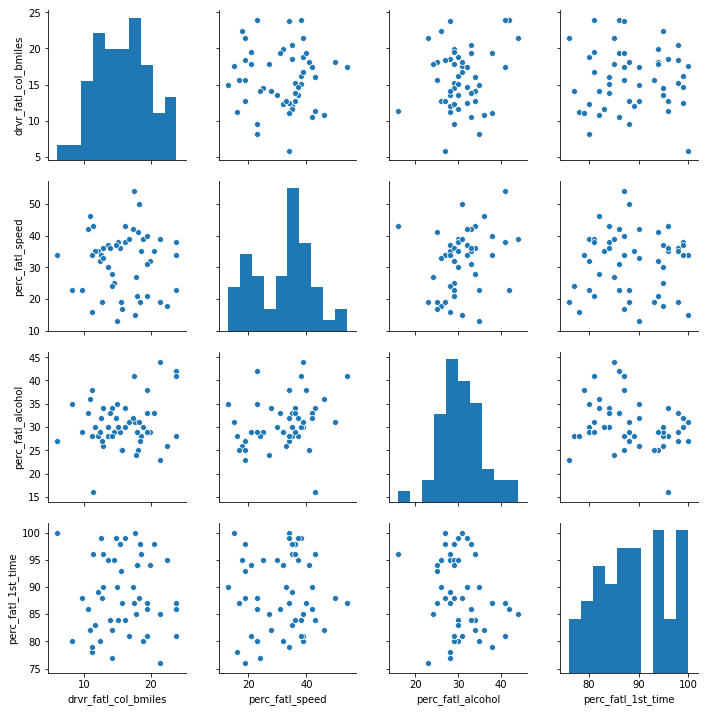

In [72]:
sns.pairplot(acc)
plt.show()

In [73]:
correlation=acc.corr()
correlation

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [74]:
#4. Quantify the association of features and accidents
features = acc[[ 'perc_fatl_alcohol', 'perc_fatl_1st_time','perc_fatl_speed']]
target = acc['drvr_fatl_col_bmiles']
reg = linear_model.LinearRegression()
reg.fit(features, target)
print(reg.coef_)


[ 0.19086404  0.02473301 -0.04180041]


In [75]:
#5. Fit a multivariate linear regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA()

The cumulative variance of the first two principal components is 0.7947



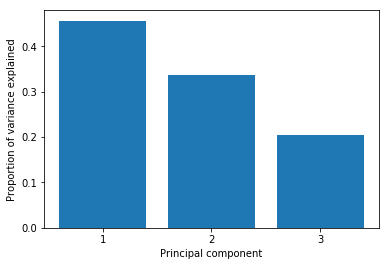

In [76]:
#6. Perform PCA on standardized data
pca.fit(features_scaled)
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])
two_first_comp_var_exp = pca.explained_variance_ratio_[0].cumsum()[0] + pca.explained_variance_ratio_[1].cumsum()[0]
print("The cumulative variance of the first two principal components is {}\n".format(
    round(two_first_comp_var_exp, 5)))

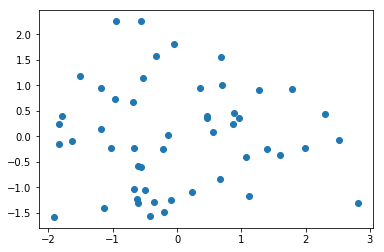

In [77]:
#7. Visualize the first two principal components
pca = PCA(n_components = 2)
p_comps = pca.fit_transform(features_scaled)
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]
plt.scatter(p_comp1, p_comp2)

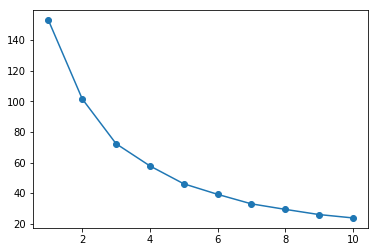

In [78]:
#8. Find clusters of similar states in the data
from sklearn.cluster import KMeans
ks = range(1, 11)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=8)
    km.fit(features_scaled)
    inertias.append(km.inertia_)

plt.plot(ks, inertias, marker='o')

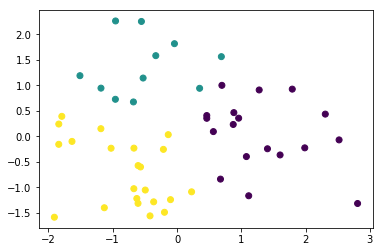

In [82]:
#9. KMeans to visualize clusters in the PCA scatter plot
km = KMeans(n_clusters=3, random_state=8)
km.fit(features_scaled)
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)

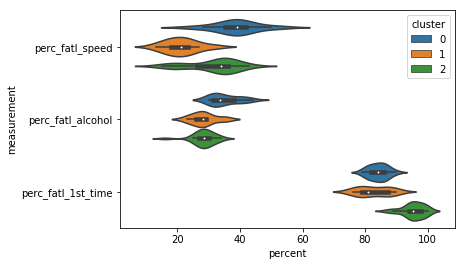

In [86]:
#10. Visualize the feature differences between the clusters
acc['cluster'] = km.labels_
melt_car = pd.melt(acc, id_vars = ['cluster'], var_name ='measurement', value_name = 'percent', 
                                                   value_vars =['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'])
sns.violinplot(melt_car['percent'], melt_car['measurement'], hue = melt_car['cluster'])

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
0,Alabama,18.8,39,30,80,0,64914,1220.3832
1,Alaska,18.1,41,25,94,2,4593,83.1333
2,Arizona,18.6,35,28,96,2,59575,1108.0950
3,Arkansas,22.4,18,26,95,2,32953,738.1472
4,California,12.0,35,28,89,2,320784,3849.4080


,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


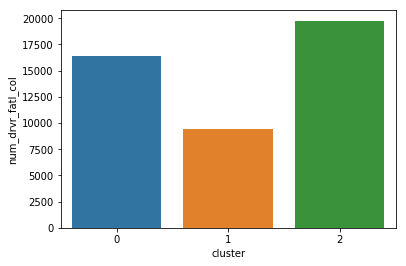

In [88]:
#11. Compute the number of accidents within each cluster
accmiles = acc.merge(miles, on='state')
accmiles['num_drvr_fatl_col'] = (accmiles['drvr_fatl_col_bmiles'] * accmiles['million_miles_annually']) / 1000

sns.barplot(x='cluster', y='num_drvr_fatl_col', data=accmiles, estimator=sum, ci=None)
total = accmiles.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
display(accmiles.head())
total

In [89]:
#12. Make a decision when there is no clear right choice
cluster_num = 2